In [62]:
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse, mse

import random

# Read

In [2]:
with zipfile.ZipFile('dds_datasets/dds_ch2_rollingsales.zip') as zip_f:
    with zip_f.open('rollingsales_manhattan.xls') as myZip:
        data1 = pd.read_excel(myZip) 

# Cleaning

In [3]:
clean_df = data1.copy()
clean_df.columns = clean_df.iloc[3]
clean_df = clean_df.iloc[4:]

clean_df.rename(columns={'APART\nMENT\nNUMBER':'APARTMENT NUMBER',
                      'SALE\nPRICE':'SALE PRICE'}, inplace=True)

clean_df['BOROUGH'] = clean_df['BOROUGH'].astype(int)
clean_df['NEIGHBORHOOD'] = clean_df['NEIGHBORHOOD'].str.strip()
clean_df['NEIGHBORHOOD'] = clean_df['NEIGHBORHOOD'].replace('' ,np.nan)
clean_df['BUILDING CLASS CATEGORY'] = clean_df['BUILDING CLASS CATEGORY'].str.strip()
clean_df['BUILDING CLASS CATEGORY'] = clean_df['BUILDING CLASS CATEGORY'].replace('' ,np.nan)
clean_df['TAX CLASS AT PRESENT'] = clean_df['TAX CLASS AT PRESENT'].astype(str)
clean_df['TAX CLASS AT PRESENT'] = clean_df['TAX CLASS AT PRESENT'].str.strip()
clean_df['TAX CLASS AT PRESENT'] = clean_df['TAX CLASS AT PRESENT'].replace('', np.nan)
clean_df['EASE-MENT'] = clean_df['EASE-MENT'].str.strip()
clean_df['EASE-MENT'] = clean_df['EASE-MENT'].replace('' ,np.nan)
clean_df['BUILDING CLASS AT PRESENT'] = clean_df['BUILDING CLASS AT PRESENT'].astype(str)
clean_df['BUILDING CLASS AT PRESENT'] = clean_df['BUILDING CLASS AT PRESENT'].str.strip()
clean_df['BUILDING CLASS AT PRESENT'] = clean_df['BUILDING CLASS AT PRESENT'].replace('', np.nan)
clean_df['APARTMENT NUMBER'] = clean_df['APARTMENT NUMBER'].astype(str)
clean_df['APARTMENT NUMBER'] = clean_df['APARTMENT NUMBER'].str.strip()
clean_df['APARTMENT NUMBER'] = clean_df['APARTMENT NUMBER'].replace('', np.nan)
clean_df['BUILDING CLASS AT TIME OF SALE'] = clean_df['BUILDING CLASS AT TIME OF SALE'].astype(str)


clean_df['BLOCK'] = clean_df['BLOCK'].astype(int)
clean_df['LOT'] = clean_df['LOT'].astype(int)
clean_df['ZIP CODE'] = clean_df['ZIP CODE'].astype(int)
clean_df['ZIP CODE'] = clean_df['ZIP CODE'].replace(0, np.nan)
clean_df['RESIDENTIAL UNITS'] = clean_df['RESIDENTIAL UNITS'].astype(int)
clean_df['COMMERCIAL UNITS'] = clean_df['COMMERCIAL UNITS'].astype(int)
clean_df['TOTAL UNITS'] = clean_df['TOTAL UNITS'].astype(int)
clean_df['LAND SQUARE FEET'] = clean_df['LAND SQUARE FEET'].astype(int)
clean_df['GROSS SQUARE FEET'] = clean_df['GROSS SQUARE FEET'].astype(int)
clean_df['YEAR BUILT'] = clean_df['YEAR BUILT'].astype(int)
clean_df['TAX CLASS AT TIME OF SALE'] = clean_df['TAX CLASS AT TIME OF SALE'].astype(int)
clean_df['SALE PRICE'] = clean_df['SALE PRICE'].astype(float)

clean_df['RESIDENTIAL UNITS'] = clean_df['RESIDENTIAL UNITS'].replace(0, np.nan)
clean_df['COMMERCIAL UNITS'] = clean_df['COMMERCIAL UNITS'].replace(0, np.nan)
clean_df['TOTAL UNITS'] = clean_df['TOTAL UNITS'].replace(0, np.nan)
clean_df['LAND SQUARE FEET'] = clean_df['LAND SQUARE FEET'].replace(0, np.nan)
clean_df['GROSS SQUARE FEET'] = clean_df['GROSS SQUARE FEET'].replace(0, np.nan)
clean_df['YEAR BUILT'] = clean_df['YEAR BUILT'].replace(0, np.nan)
clean_df['TAX CLASS AT TIME OF SALE'] = clean_df['TAX CLASS AT TIME OF SALE'].replace(0, np.nan)
clean_df['SALE PRICE'] = clean_df['SALE PRICE'].replace(0, np.nan)


clean_df['SALE DATE'] = pd.to_datetime(clean_df['SALE DATE'])
# only keep realistic looking sale prices
clean_df = clean_df[clean_df['SALE PRICE']>=100000]
clean_df = clean_df.reset_index(drop=True)

clean_df.columns = ['_'.join(c.split()).lower() for c in clean_df.columns]

In [4]:
# take the log to normalize
clean_df['sales_log'] = np.log(clean_df['sale_price'])
clean_df['residential_units_log'] = np.log(clean_df['residential_units'])
clean_df['total_units_log'] = np.log(clean_df['total_units'])
clean_df['gross_square_feet_log'] = np.log(clean_df['gross_square_feet'])

In [5]:
(clean_df.isnull().sum()/len(clean_df)).sort_values(ascending=False)

ease-ment                         1.000000
commercial_units                  0.935775
gross_square_feet                 0.901510
gross_square_feet_log             0.901510
land_square_feet                  0.897322
apartment_number                  0.608870
residential_units_log             0.567705
residential_units                 0.567705
total_units                       0.510616
total_units_log                   0.510616
year_built                        0.128037
building_class_category           0.015511
tax_class_at_present              0.006782
building_class_at_present         0.006782
neighborhood                      0.001003
zip_code                          0.000059
block                             0.000000
lot                               0.000000
sale_date                         0.000000
address                           0.000000
sale_price                        0.000000
sales_log                         0.000000
tax_class_at_time_of_sale         0.000000
building_cl

# Linear Regression

reasons for trying linear regression:
- continuous target variable
- relationship between a few of these variables and sales look approximately linear
- normally distributed error term after fitting with mean 0


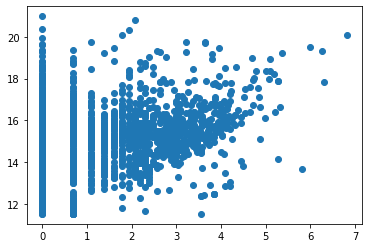

In [18]:
plt.scatter(clean_df['total_units_log'], clean_df['sales_log'])

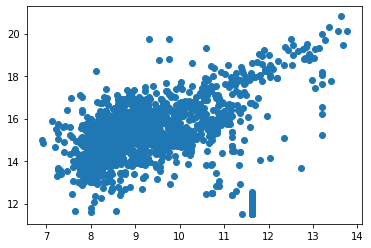

In [25]:
plt.scatter(clean_df['gross_square_feet_log'], clean_df['sales_log'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

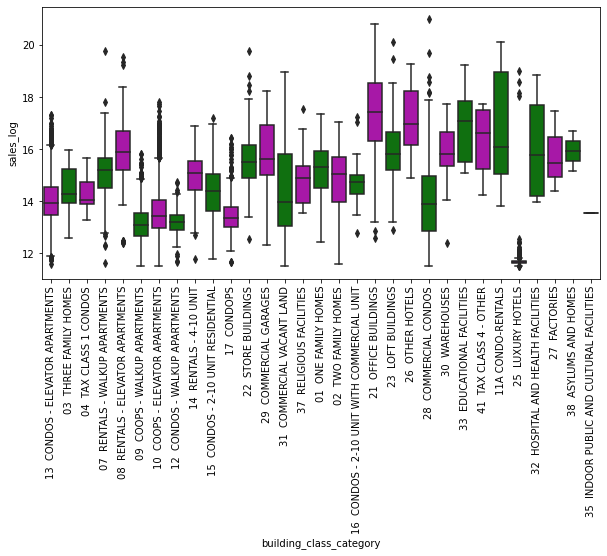

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
g = sns.boxplot(x="building_class_category", y="sales_log", palette=["m", "g"],
            data=clean_df, ax=ax)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text major ticklabel objects>)

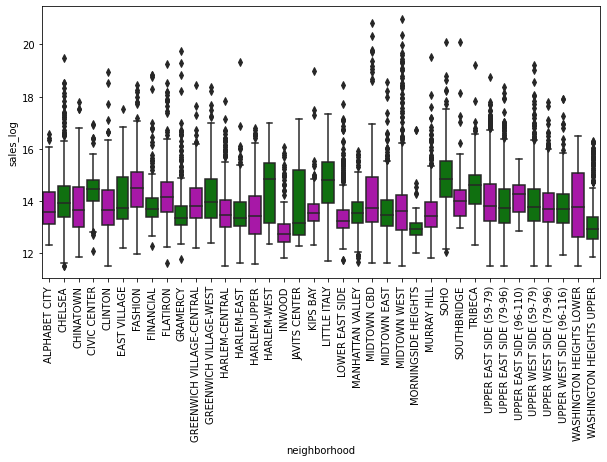

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))
g = sns.boxplot(x="neighborhood", y="sales_log", palette=["m", "g"],
            data=clean_df, ax=ax)
plt.xticks(rotation=90)

In [55]:
patsy = "sales_log ~ total_units_log + gross_square_feet_log\
         + neighborhood*building_class_category + building_class_at_time_of_sale"
model = ols(patsy, data=clean_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sales_log   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     24.88
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:27:53   Log-Likelihood:                -1567.1
No. Observations:                1667   AIC:                             3828.
Df Residuals:                    1320   BIC:                             5708.
Df Model:                         346                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================================================================
                                                                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                            5.2868      2.551      2.072      0.038       0.282      10.292
neighborhood[T.CHELSEA]                                                                                              0.6224      0.372      1.671      0.095      -0.108       1.353
neighborhood[T.CHINATOWN]                                                                                            0.0784      0.252      0.312      0.755      -0.415       0.572
neighborhood[T.CIVIC CENTER]                                                                                        -0.4751      0.319     -1.491      0.136      -1.100       0.150
neighborhood[T.CLINTON]                                                                                              0.2298      0.239      0.960      0.337      -0.240       0.699
neighborhood[T.EAST VILLAGE]                                                                                         0.7335      0.801      0.915      0.360      -0.839       2.306
neighborhood[T.FASHION]                                                                                             -0.3326      0.705     -0.472      0.637      -1.715       1.050
neighborhood[T.FINANCIAL]                                                                                            0.1334      0.246      0.542      0.588      -0.350       0.617
neighborhood[T.FLATIRON]                                                                                            -0.2422      0.255     -0.950      0.342      -0.743       0.258
neighborhood[T.GRAMERCY]                                                                                             0.0203      0.522      0.039      0.969      -1.005       1.045
neighborhood[T.GREENWICH VILLAGE-CENTRAL]                                                                            0.2663      0.368      0.724      0.469      -0.455       0.987
neighborhood[T.GREENWICH VILLAGE-WEST]                                                                               0.6975      0.280      2.487      0.013       0.147       1.248
neighborhood[T.HARLEM-CENTRAL]                                                                                      -1.1992      0.283     -4.239      0.000      -1.754      -0.644
neighborhood[T.HARLEM-EAST]                                                                                         -1.2184      0.391     -3.117      0.002      -1.985      -0.452
neighb

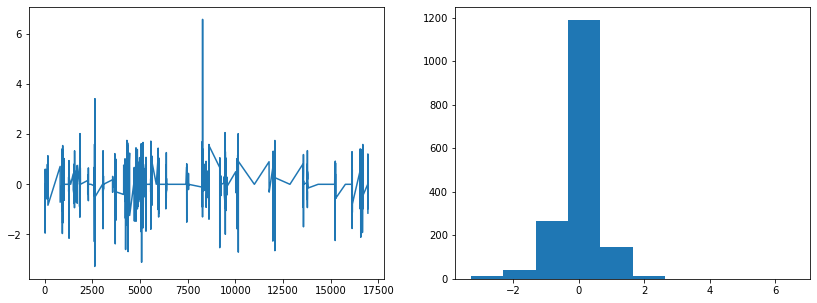

In [11]:
# residuals should be approx normal
fig, axes = plt.subplots(1,2,figsize=(14,5))
a = axes[0].plot(results.resid)
b = axes[1].hist(results.resid)

# KNN

https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix

from geopy.geocoders import Nominatim

In [76]:
pd.set_option('display.max_columns',30)

In [74]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16956 entries, 0 to 16955
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   borough                         16956 non-null  int64         
 1   neighborhood                    16939 non-null  object        
 2   building_class_category         16693 non-null  object        
 3   tax_class_at_present            16841 non-null  object        
 4   block                           16956 non-null  int64         
 5   lot                             16956 non-null  int64         
 6   ease-ment                       0 non-null      float64       
 7   building_class_at_present       16841 non-null  object        
 8   address                         16956 non-null  object        
 9   apartment_number                6632 non-null   object        
 10  zip_code                        16955 non-null  float64       
 11  re

In [86]:
print(clean_df.describe(include='all'))

        borough             neighborhood          building_class_category  \
count   16956.0                    16939                            16693   
unique      NaN                       38                               31   
top         NaN  UPPER EAST SIDE (59-79)  10  COOPS - ELEVATOR APARTMENTS   
freq        NaN                     1907                             6802   
first       NaN                      NaN                              NaN   
last        NaN                      NaN                              NaN   
mean        1.0                      NaN                              NaN   
std         0.0                      NaN                              NaN   
min         1.0                      NaN                              NaN   
25%         1.0                      NaN                              NaN   
50%         1.0                      NaN                              NaN   
75%         1.0                      NaN                              NaN   

In [94]:
clean_df.shape

(16956, 25)

In [54]:
clean_df.isnull().sum().sort_values()

borough                               0
building_class_at_time_of_sale        0
tax_class_at_time_of_sale             0
sales_log                             0
sale_price                            0
address                               0
sale_date                             0
lot                                   0
block                                 0
neighborhood                          0
zip_code                              1
building_class_at_present            98
tax_class_at_present                 98
building_class_category             263
year_built                         2154
total_units_log                    8641
total_units                        8641
residential_units                  9609
residential_units_log              9609
apartment_number                  10307
land_square_feet                  15198
gross_square_feet_log             15269
gross_square_feet                 15269
commercial_units                  15850
ease-ment                         16939


In [172]:
# cluster by cooridates
addresses = clean_df[['address','zip_code']].drop_duplicates()
addresses = addresses[~addresses['zip_code'].isnull()]
addresses['address'] = addresses['address'].str.split(',').str.get(0)
addresses = addresses.reset_index(drop=True)

addresses['longitude'] = 0
addresses['latitude'] = 0

In [173]:
geolocator = Nominatim(user_agent="my-app")

for i in range(len(addresses)):
    address = addresses.iloc[i]['address'].strip()
    zipcode = str(int(addresses.iloc[i]['zip_code']))
    query = {'street':address,'postalcode':zipcode,'city':'Manhattan','state':'NY'}
    location = geolocator.geocode(query=query)
    if location != None:
        addresses.loc[i, 'longitude'] = location.longitude
        addresses.loc[i, 'latitude'] = location.latitude
    else:
        print(address)
        print(zipcode)

500 EAST 11 STREET
10009
198 EAST 7 STREET
10009
300 EAST 4 STREET
10009
383 EAST 10 STREET
10009
643 EAST 11 STREET
10009
360 WEST 21 STREET
10011
231 WEST 16TH
10011
148 WEST 16 STREET
10011
425 WEST 24 STREET
10011
201 WEST 21 STREET
10011
201 WEST 21 STREET
10011
201 WEST 21 STREET
10011
225 W25TH STREET
10001
420 WEST 25 STREET
10001
420 W. 25 ST
10001
263 9 AVENUE
10001
135 WEST 16TH
10011
151 WEST 17 STREET
10011
130 WEST 19TH
10011
125 WEST 21 STREET
10011
159 WEST 24 STREET
10011
136 W 22 ST
10011
136 WEST 22 STREET
10011
641 AVENUE OF THE AMER
10011
58 9 AVENUE
10011
727 AVENUE OF THE AMER
10010
635 AVENUE OF THE AMER
10011
747 9 AVENUE
10019
457 WEST 57TH
10019
141 EAST 3 STREET
10009
32 WEST 40 STREET
10018
100 WEST 39 STREET
10018
104 WEST40TH STREET
10018
41 WEST 16TH
10011
10 WEST 15 STREET
10011
10 WEST 15 ST
10011
10 WEST 15 STREET
10011
10 WEST 15 STREET
10011
16 W 16TH
10011
16 WEST16TH STREET
10011
16 WEST 16TH
10011
4 WEST 21 STREET
10010
21 EAST 22 STREET
10010
22

687 WEST 204
10034
585 WEST 214 ST
10034
425 WEST 218 STREET
10034
350 EAST 19 STREET
10003
305 EAST 24 STREET
10010
305 EAST 24 STREET
10010
333 EAST 34 STREET
10016
311 EAST 38 STREET
10016
415 EAST 37 STREET
10016
455 F D R DRIVE
10002
475 F.D.R DRIVE
10002
5 WEST 101 STREET
10025
21 WEST 106 STREET
10025
4 WEST 108 STREET
10025
8 WEST 108 STREET
10025
302 WEST 114 STREET
10026
312 WEST 114 STREET
10026
15 WEST 107 STREET
10025
7 WEST 108 STREET
10025
3 WEST 108 STREET
10025
61 WEST 104 STREET
10025
7 WEST96TH STREET
10025
4 WEST 105 STREET
10025
4 WEST 109 STREET
10025
67 WEST 107 STREET
10025
63 WEST 107 STREET
10025
2131 FREDRICK DOUGLASS BL
10026
135 EAST 54 STREET
10022
140 E. 56 ST
10022
150 EAST 56 STREET
10022
220 EAST 54 STREET
10022
245 EAST 54 STREET
10022
245 EAST 54 STREET
10022
245 EAST 54 STREET
10022
240 E 55 ST
10022
209 EAST 56 STREET
10022
305 E 40 ST
10016
305 E. 40 ST
10016
305 EAST 40 STREET
10016
333 EAST 41 STREET
10017
333 EAST 41 STREET
10017
320 EAST 42 ST

310 WEST 106 STREET
10025
310 WEST 106 STREET
10025
390 RSD
10025
615 WEST 113 STREET
10025
209 WEST 104 STREET
10025
272 WEST 107 STREET
10025
200 WEST 109 STREET
10025
318 WEST 100 STREET
10025
314 WEST 100 STREET
10025
235 WEST 102 STREET
10025
235 WEST 102 STREET
10025
301 WEST 108 STREET
10025
432 WEST 162 STREET
10032
613 WEST 169 STREET
10032
521-523 WEST 156 STREET
10032
531 WEST 156 STREET
10032
539 WEST 156 STREET
10032
516 WEST 159 STREET
10032
571 WEST 159 STREET
10032
574 WEST 161 STREET
10032
522 WEST 161 STREET
10032
505 WEST 161 STREET
10032
502 WEST 167 STREET
10032
510 WEST 171 STREET
10032
508 WEST 172 STREET
10032
526 WEST 173 STREET
10032
605 WEST 177 STREET
10033
570 WEST 156 STREET
10032
625 WEST 156 STREET
10032
25 FORT WASHINGTON AVEN
10032
566 WEST 159
10032
565 W. 169 ST
10032
611 WEST156TH STREET
10032
371 FT. WASHINGTON AVENU
10033
371 FORT WASHINGTON AVEN
10033
359 FORT WASHINGTON AVEN
10033
1248 SAINT NICHOLAS AVENU
10032
446 WEST 163 STREET
10032
563 WES

In [174]:
addresses.head()

,address,zip_code,longitude,latitude
0,345 WEST 14TH STREET,10014.0,-74.005344,40.740946
1,229 EAST 2ND STREET,10009.0,-73.982494,40.721437
2,243 EAST 7TH STREET,10009.0,-73.978167,40.723987
3,238 EAST 4TH STREET,10009.0,-73.983016,40.723281
4,715 EAST 5TH STREET,10009.0,-73.978860,40.722750


In [175]:
cluster_df = clean_df[['address','zip_code','neighborhood']].copy().drop_duplicates()
cluster_df = cluster_df.merge(addresses, on=['address','zip_code'])
cluster_df = cluster_df[~cluster_df['neighborhood'].isnull()]

In [184]:
cluster_df.head()

,address,zip_code,neighborhood,longitude,latitude
1,229 EAST 2ND STREET,10009.0,ALPHABET CITY,-73.982494,40.721437
2,243 EAST 7TH STREET,10009.0,ALPHABET CITY,-73.978167,40.723987
3,238 EAST 4TH STREET,10009.0,ALPHABET CITY,-73.983016,40.723281
4,715 EAST 5TH STREET,10009.0,ALPHABET CITY,-73.978860,40.722750
5,274 EAST SEVENTH STREET,10009.0,ALPHABET CITY,-73.992127,40.719418


In [186]:
features = ['longitude','latitude']
class_name = 'neighborhood'

In [187]:
X_train, X_test, y_train, y_test = train_test_split(cluster_df[features],
                                                    cluster_df[class_name],
                                                    test_size=0.2, random_state=42)

In [207]:
print(y_test.value_counts())
print()
print(y_train.value_counts())

HARLEM-CENTRAL               56
UPPER EAST SIDE (59-79)      55
CHELSEA                      52
UPPER EAST SIDE (79-96)      39
MIDTOWN WEST                 33
UPPER WEST SIDE (59-79)      29
MIDTOWN EAST                 26
GREENWICH VILLAGE-CENTRAL    25
GREENWICH VILLAGE-WEST       24
TRIBECA                      22
SOHO                         21
MANHATTAN VALLEY             19
UPPER WEST SIDE (79-96)      19
LOWER EAST SIDE              18
CLINTON                      18
HARLEM-EAST                  18
HARLEM-UPPER                 17
FLATIRON                     16
EAST VILLAGE                 16
CHINATOWN                    16
WASHINGTON HEIGHTS LOWER     16
WASHINGTON HEIGHTS UPPER     15
MURRAY HILL                  14
FASHION                      13
UPPER WEST SIDE (96-116)     13
FINANCIAL                    12
CIVIC CENTER                 11
ALPHABET CITY                10
KIPS BAY                      8
MIDTOWN CBD                   8
SOUTHBRIDGE                   6
LITTLE I

In [190]:
error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

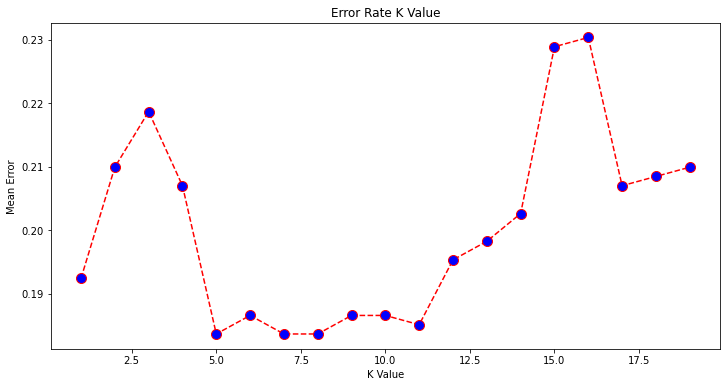

In [192]:
# lowest error seems to be at 5, 7 , or 8
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [215]:
# do 7 since odd number prevents a tie
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
error = np.mean(y_pred != y_test)

In [216]:
print(error)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.1836734693877551
                           precision    recall  f1-score   support

            ALPHABET CITY       1.00      0.90      0.95        10
                  CHELSEA       0.96      0.85      0.90        52
                CHINATOWN       0.83      0.94      0.88        16
             CIVIC CENTER       1.00      0.82      0.90        11
                  CLINTON       0.94      0.89      0.91        18
             EAST VILLAGE       1.00      0.62      0.77        16
                  FASHION       0.79      0.85      0.81        13
                FINANCIAL       1.00      0.92      0.96        12
                 FLATIRON       0.75      0.75      0.75        16
                 GRAMERCY       0.83      1.00      0.91         5
GREENWICH VILLAGE-CENTRAL       0.91      0.80      0.85        25
   GREENWICH VILLAGE-WEST       0.91      0.88      0.89        24
           HARLEM-CENTRAL       0.43      0.88      0.58        56
              HARLEM-EAST       0.50      

/home/helloannietran/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Notes

- Overall, using coordinates to identify neighboorhood works pretty well
- A few things I could try:
    - Stratify split between the labels
    - HARLEM-CENTRAL has the highest support but pretty mediocre recall. Including more features might help.
    - Combine some of these neighborhoods
    - Rename some of these address could improve match. Like West to W